In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [3]:
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [4]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=0)


In [6]:
print(X_train)
print(y_train)

     Age  EstimatedSalary
336   58           144000
64    59            83000
55    24            55000
106   26            35000
300   58            38000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[320 rows x 2 columns]
336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [8]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_classifier.fit(X_train, y_train)


SVC(random_state=0)

In [9]:
y_pred = svm_classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[54  4]
 [ 1 21]]
Accuracy: 0.94


In [11]:
from matplotlib.colors import ListedColormap

C:\Users\Tejus Kapoor\AppData\Local\Temp\ipykernel_14532\2150709096.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


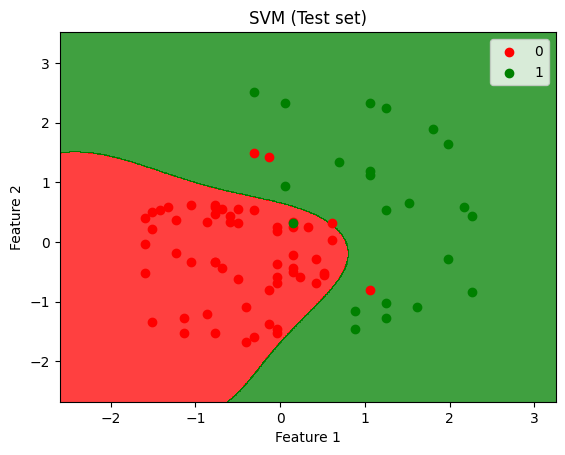

In [12]:
# Visualizing the results (for 2D data)
if X.shape[1] == 2:
    # Plotting decision boundary
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, svm_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('SVM (Test set)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()